<a href="https://colab.research.google.com/github/Sicily-F/cagedbirdID/blob/main/12_Superimposing_uncaged_images_with_caged_masks_in_the_foreground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 12. Superimposing uncaged images with caged masks in the foreground, 

All photos detected as uncage in the file 11. were then overlayed with transparent masks of cage bars, which were manually segmented using the GNU Image Manipulation Program, GIMP, version 2.10.22 (GIMP, 2020). Sixty masks were used, 56 of which were generated from real images, whereas four transparent png’s were downloaded from Google to introduce further variation, using the search terms ‘transparent bars png’. The mask files can be found in the 'cagebar_masks' folder in this repository.

In [ ]:
import PIL.Image as Image
import numpy as np
import random
import cv2
import os
import glob
from pathlib import Path

In [ ]:
# How to mix it all together, we need the files in png form in order to blend them
collection = "F:/all_species_augmented_croppe/test_uncaged"
for i, filename in enumerate(os.listdir(collection)):
    os.rename("F:/all_species_augmented_croppe/test_uncaged/" + filename, "F:/all_species_augmented_croppe/test_uncaged/" + "uncaged" + str(i) + ".png")
    

In [ ]:
bars = [Image.open(file).convert("RGBA") for file in glob.glob("C:/Users/Sicily/bars/*.png")] # the glob also needs to take jpeg files

In [ ]:
inputPath = Path("F:/sortedpnguncaged/")
inputFiles = inputPath.glob("**/*.png")
outputPath = Path("F:/latestblend")
for f in inputFiles:
    outputFile = outputPath/Path(f.stem + ".png")
    fore = random.choice(bars)
    back = Image.open(f).convert("RGBA")
    size = (1354,2030)
    foreground = fore.resize(size,Image.ANTIALIAS)
    background = back.resize(size,Image.ANTIALIAS)
    blend = background.paste(foreground, (0, 0), foreground)
    background.save(outputFile) 

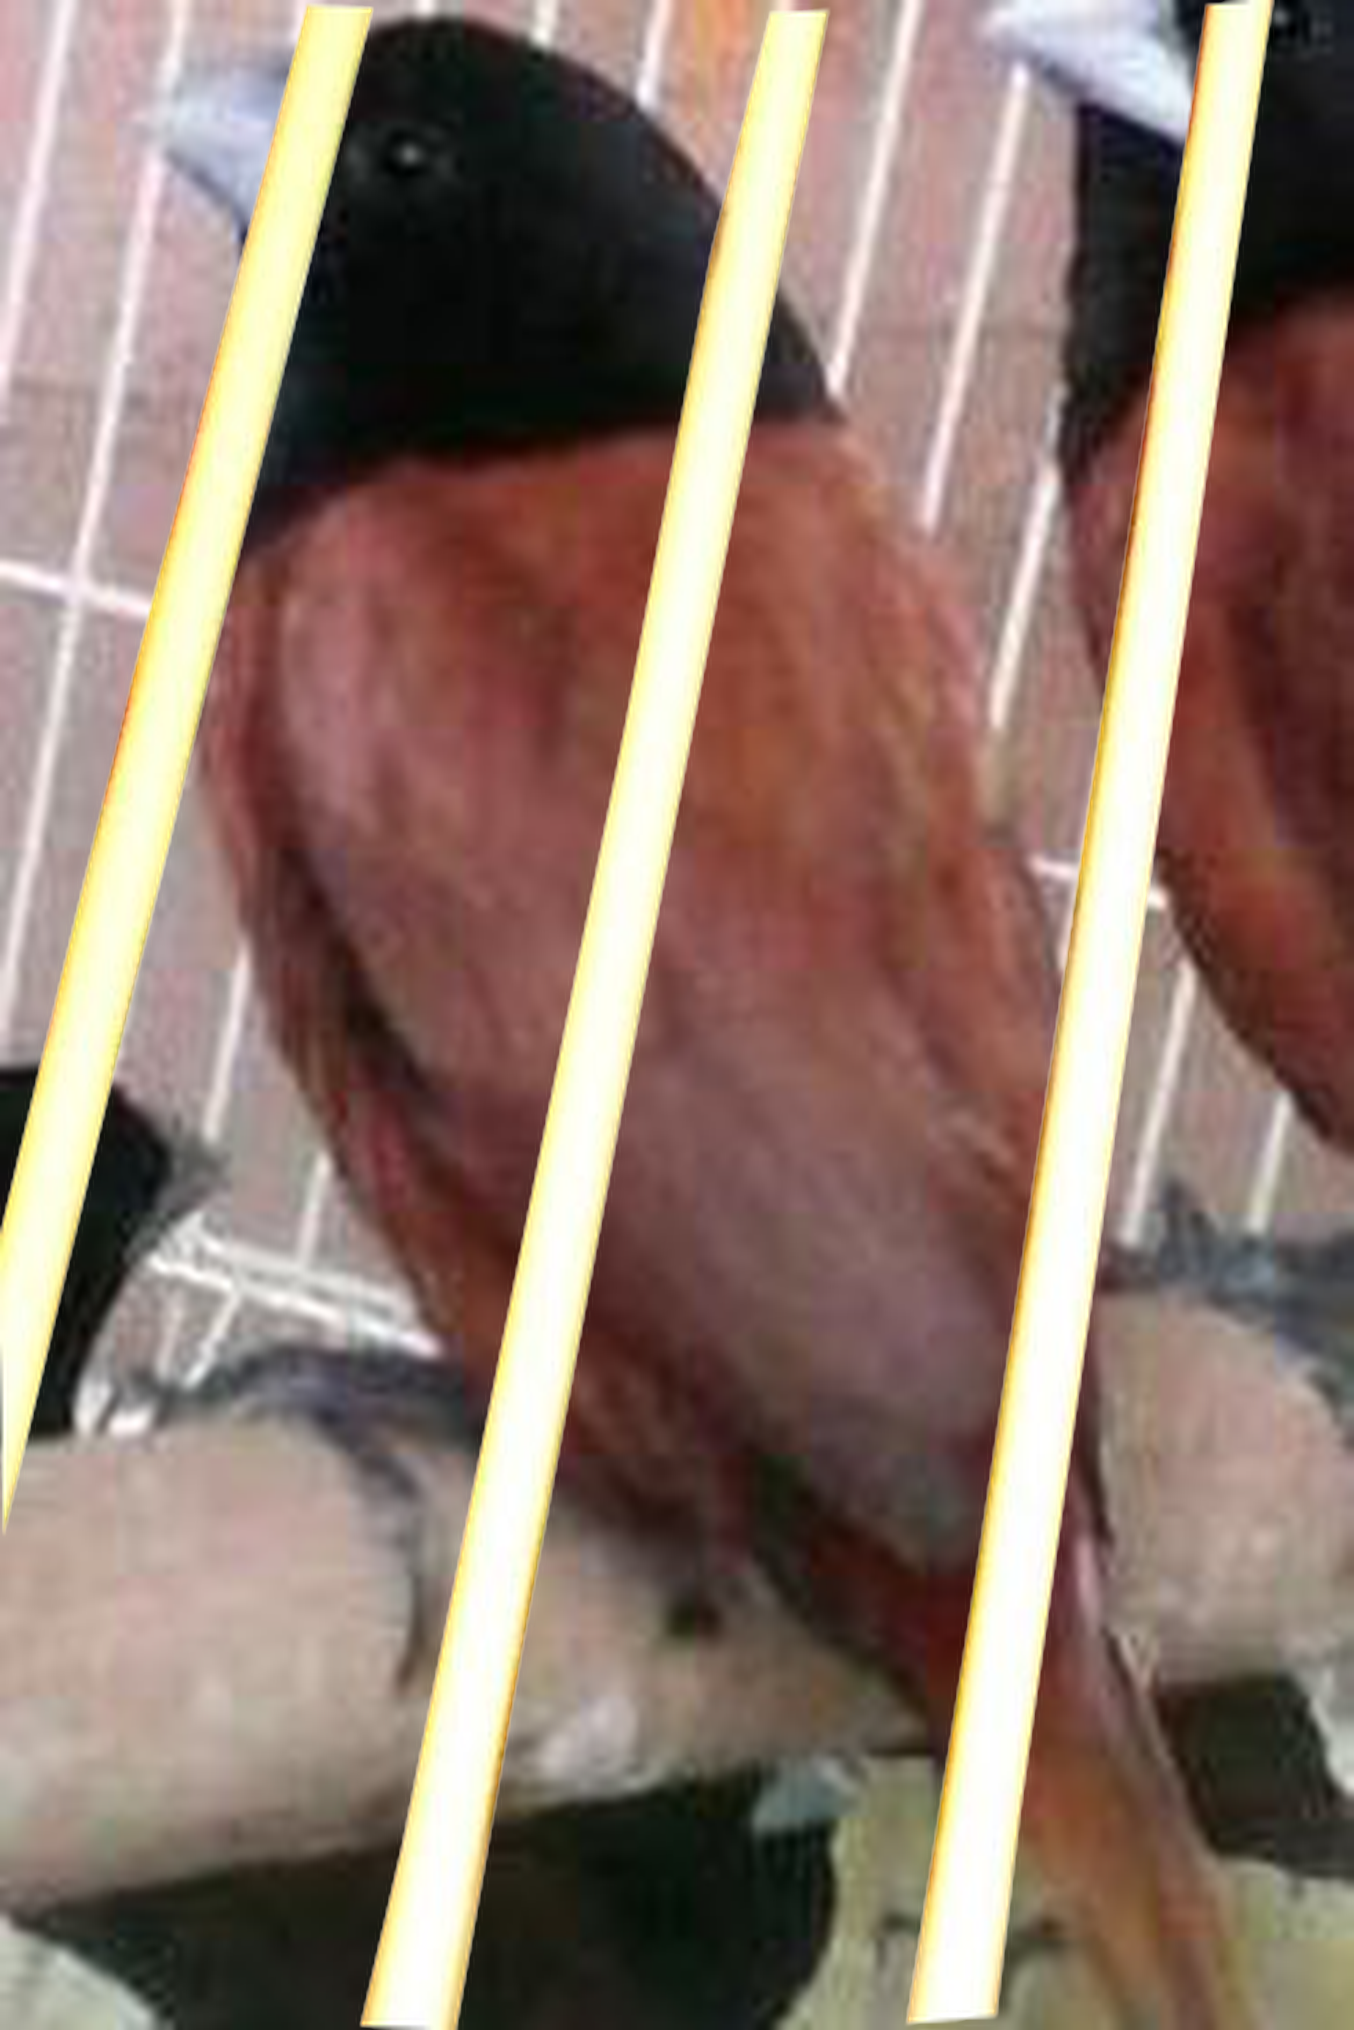